<a href="https://colab.research.google.com/github/HyeongMinK/MLMovieProj/blob/main/Ridge_a_value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation Matrix
                          w1_au   w1_rank  w1_av_sc  w1_av_sales  w1_df_rank  \
w1_au                  1.000000 -0.433667  0.940348     0.572203    0.183080   
w1_rank               -0.433667  1.000000 -0.452207    -0.237265   -0.672653   
w1_av_sc               0.940348 -0.452207  1.000000     0.662287    0.169914   
w1_av_sales            0.572203 -0.237265  0.662287     1.000000    0.141698   
w1_df_rank             0.183080 -0.672653  0.169914     0.141698    1.000000   
di_ca_au_y3            0.453614 -0.138364  0.431790     0.236690    0.067660   
Distributors_mv_au_y3  0.305730 -0.281000  0.246390     0.073291    0.043109   
actor_mv_au_y3         0.395069 -0.382680  0.399512     0.208906    0.167257   
Week1_Avg             -0.083375  0.195415 -0.016197     0.136354   -0.074305   
Over_12                0.100429 -0.220714  0.137713     0.156566    0.131102   
Over_15                0.026001 -0.003599 -0.032291    -0.105475    0.094768   
General_Audience     

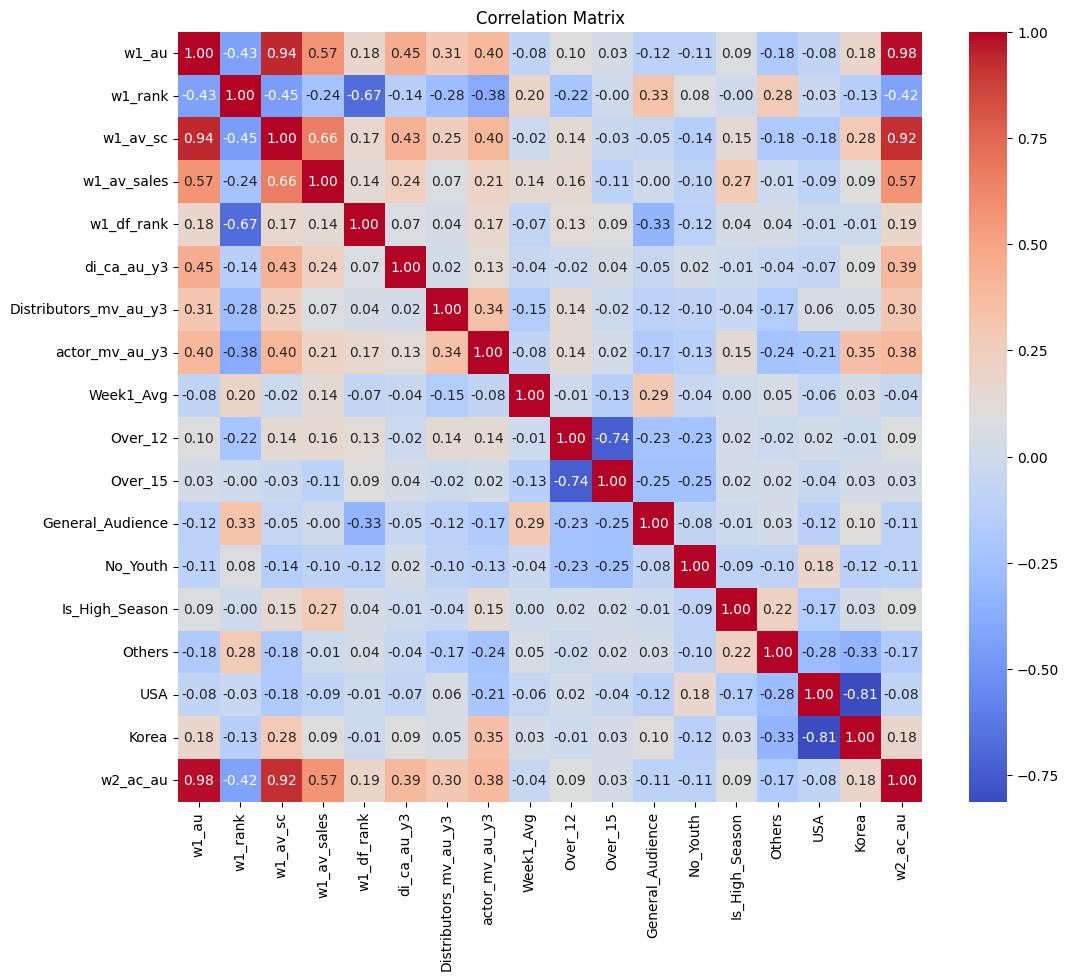

Best alpha for RMSE: 0.19999999999999998 with RMSE: 218612.31465538472
Selected features for RMSE: ['w1_au' 'w1_rank' 'w1_av_sc' 'w1_av_sales' 'w1_df_rank' 'di_ca_au_y3'
 'Distributors_mv_au_y3' 'actor_mv_au_y3' 'Week1_Avg' 'Is_High_Season'
 'Over_12' 'Over_15' 'General_Audience' 'No_Youth' 'USA' 'Korea' 'Others']
Best alpha for MAPE: 0.38 with MAPE: 9.94799543575941
Selected features for MAPE: ['w1_au' 'w1_rank' 'w1_av_sc' 'w1_av_sales' 'w1_df_rank' 'di_ca_au_y3'
 'Distributors_mv_au_y3' 'actor_mv_au_y3' 'Week1_Avg' 'Is_High_Season'
 'Over_12' 'Over_15' 'General_Audience' 'No_Youth' 'USA' 'Korea' 'Others']
Best alpha for R²: 0.08 with R²: 0.9626081372476327
Selected features for R²: ['w1_au' 'w1_rank' 'w1_av_sc' 'w1_av_sales' 'w1_df_rank' 'di_ca_au_y3'
 'Distributors_mv_au_y3' 'actor_mv_au_y3' 'Week1_Avg' 'Is_High_Season'
 'Over_12' 'Over_15' 'General_Audience' 'No_Youth' 'USA' 'Korea' 'Others']


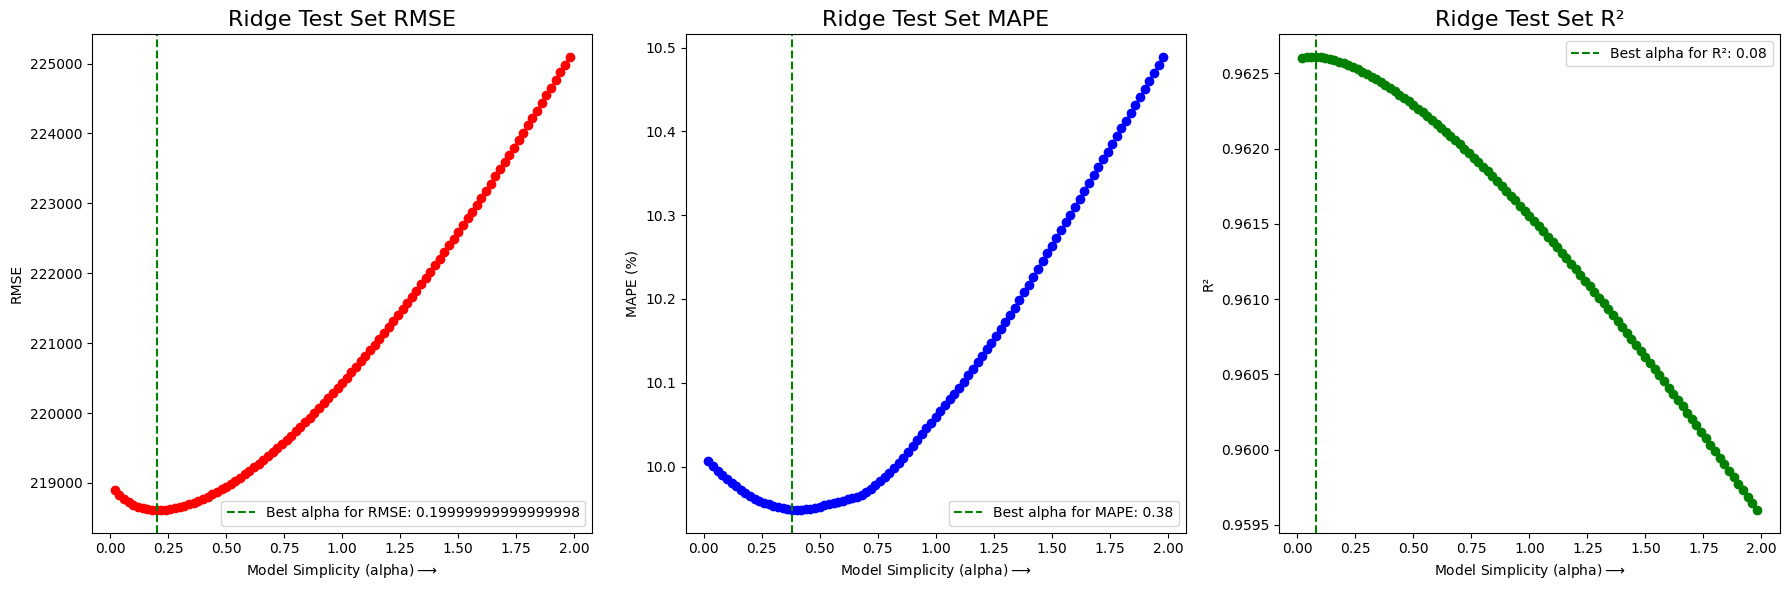

In [ ]:
#w2 예측 코드(알파값 찾기)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# CSV 파일 읽기
file_path = 'preprosessing_ver15.csv'  # 파일 경로를 지정하세요
df = pd.read_csv(file_path)

# 타겟 변수 설정
target_variable = 'w2_ac_au'

# 숫자형 데이터만 선택
numeric_cols = df.select_dtypes(include=[np.number]).columns

# 제외할 열들
exclude_cols = ['w1_slope', 'w1_df_rank', 'w1_mean_diff', 'w2_slope', 'w2_df_rank', 'w2_mean_diff']

# 범주형 열들 (예를 들어 사용자가 지정한 범주형 열들)
categorical_cols = ['Is_High_Season', 'Over_12', 'Over_15', 'General_Audience', 'No_Youth', 'USA', 'Korea', 'Others']

# 제외할 열들을 뺀 나머지 열들
cols_to_transform = [col for col in numeric_cols if col not in exclude_cols]

# 나머지 열들에 대해 0 이하의 값을 작은 양수로 대체
df[cols_to_transform] = df[cols_to_transform].apply(lambda x: np.where(x > 0, x, 1e-6))

user_selected_features = [
   'w1_au', 'w1_rank', 'w1_av_sc', 'w1_av_sales',  'w1_df_rank',
   'di_ca_au_y3', 'Distributors_mv_au_y3', 'actor_mv_au_y3', 'Week1_Avg',
   'Over_12', 'Over_15', 'General_Audience', 'No_Youth', 'Is_High_Season',
   'Others', 'USA', 'Korea'
]

# 제공된 기본 피처 세트를 사용
X_transformed = df[user_selected_features].copy()

# 로그 변환 (exclude_cols 제외)
numeric_features_to_log = [col for col in user_selected_features if col not in categorical_cols + exclude_cols]
X_transformed[numeric_features_to_log] = np.log1p(X_transformed[numeric_features_to_log])
y_transformed = np.log1p(df[target_variable])

# 수치형 열만 스케일링
numeric_features = [col for col in user_selected_features if col not in categorical_cols]
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_transformed[numeric_features])

# 스케일링 된 수치형 데이터와 범주형 데이터를 다시 결합
X_combined = np.concatenate([X_numeric_scaled, X_transformed[categorical_cols].values], axis=1)

# 전체 피처 이름 리스트
combined_feature_names = numeric_features + categorical_cols

# 상관 계수 매트릭스 계산
correlation_matrix = df[user_selected_features + [target_variable]].corr()
print("Correlation Matrix")
print(correlation_matrix)
# 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# K-Fold 설정
k_fold = KFold(n_splits=10, shuffle=True, random_state=20)

# Ridge 모델 학습 및 평가
alphas = np.arange(0.02, 2, 0.02)
ridge_rmse_test = np.zeros(len(alphas))
ridge_mape_test = np.zeros(len(alphas))
ridge_r2_test = np.zeros(len(alphas))
ridge_coefs = np.zeros((len(alphas), X_combined.shape[1]))

for train_idx, test_idx in k_fold.split(X_combined):
    X_train, X_test = X_combined[train_idx], X_combined[test_idx]
    y_train, y_test = y_transformed.iloc[train_idx], y_transformed.iloc[test_idx]

    for i, alpha in enumerate(alphas):
        ridge_reg = Ridge(alpha=alpha)
        ridge_reg.fit(X_train, y_train)
        ridge_coefs[i] += ridge_reg.coef_ / k_fold.n_splits

        # 예측
        y_test_pred = ridge_reg.predict(X_test)

        # 예측값을 원래 스케일로 변환
        y_test_pred_original = np.expm1(y_test_pred)
        y_test_original = np.expm1(y_test)

        # RMSE 계산
        ridge_rmse_test[i] += mean_squared_error(y_test_original, y_test_pred_original, squared=False) / k_fold.n_splits

        # MAPE 계산 (퍼센트로 변환)
        ridge_mape_test[i] += mean_absolute_percentage_error(y_test_original, y_test_pred_original) * 100 / k_fold.n_splits

        # R^2 계산
        ridge_r2_test[i] += r2_score(y_test_original, y_test_pred_original) / k_fold.n_splits

# 최적의 알파 값과 해당하는 MAPE, RMSE, R² 값 찾기
min_rmse_index = np.argmin(ridge_rmse_test)
min_mape_index = np.argmin(ridge_mape_test)
max_r2_index = np.argmax(ridge_r2_test)

best_alpha_rmse = alphas[min_rmse_index]
best_rmse = ridge_rmse_test[min_rmse_index]

best_alpha_mape = alphas[min_mape_index]
best_mape = ridge_mape_test[min_mape_index]

best_alpha_r2 = alphas[max_r2_index]
best_r2 = ridge_r2_test[max_r2_index]

# 선택된 피처 출력
selected_features_rmse = np.array(combined_feature_names)[ridge_coefs[min_rmse_index] != 0]
selected_features_mape = np.array(combined_feature_names)[ridge_coefs[min_mape_index] != 0]
selected_features_r2 = np.array(combined_feature_names)[ridge_coefs[max_r2_index] != 0]

# 결과 출력
print(f"Best alpha for RMSE: {best_alpha_rmse} with RMSE: {best_rmse}")
print(f"Selected features for RMSE: {selected_features_rmse}")

print(f"Best alpha for MAPE: {best_alpha_mape} with MAPE: {best_mape}")
print(f"Selected features for MAPE: {selected_features_mape}")

print(f"Best alpha for R²: {best_alpha_r2} with R²: {best_r2}")
print(f"Selected features for R²: {selected_features_r2}")

# plot RMSE, MAPE, R^2
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(alphas, ridge_rmse_test, 'ro-')
plt.title("Ridge Test Set RMSE", fontsize=16)
plt.xlabel("Model Simplicity (alpha)$\longrightarrow$")
plt.ylabel("RMSE")
plt.axvline(x=best_alpha_rmse, color='g', linestyle='--', label=f'Best alpha for RMSE: {best_alpha_rmse}')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(alphas, ridge_mape_test, 'bo-')
plt.title("Ridge Test Set MAPE", fontsize=16)
plt.xlabel("Model Simplicity (alpha)$\longrightarrow$")
plt.ylabel("MAPE (%)")
plt.axvline(x=best_alpha_mape, color='g', linestyle='--', label=f'Best alpha for MAPE: {best_alpha_mape}')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(alphas, ridge_r2_test, 'go-')
plt.title("Ridge Test Set R²", fontsize=16)
plt.xlabel("Model Simplicity (alpha)$\longrightarrow$")
plt.ylabel("R²")
plt.axvline(x=best_alpha_r2, color='g', linestyle='--', label=f'Best alpha for R²: {best_alpha_r2}')
plt.legend()

plt.tight_layout()
plt.show()


Correlation Matrix
                       w2_ac_au   w2_rank  w2_av_sc  w2_av_sales  w2_df_rank  \
w2_ac_au               1.000000 -0.427385  0.901557     0.495683    0.280585   
w2_rank               -0.427385  1.000000 -0.439597    -0.215273   -0.819225   
w2_av_sc               0.901557 -0.439597  1.000000     0.712977    0.310663   
w2_av_sales            0.495683 -0.215273  0.712977     1.000000    0.193528   
w2_df_rank             0.280585 -0.819225  0.310663     0.193528    1.000000   
di_ca_au_y3            0.385372 -0.137085  0.239659     0.111367    0.087766   
Distributors_mv_au_y3  0.297002 -0.247234  0.195139    -0.019085    0.125041   
actor_mv_au_y3         0.383401 -0.368153  0.321264     0.094571    0.223979   
Week2_Avg             -0.057748  0.161467  0.080725     0.212667   -0.077642   
Over_12                0.092551 -0.244622  0.135756     0.103400    0.184289   
Over_15                0.028240  0.007146 -0.050978    -0.095466   -0.016000   
General_Audience     

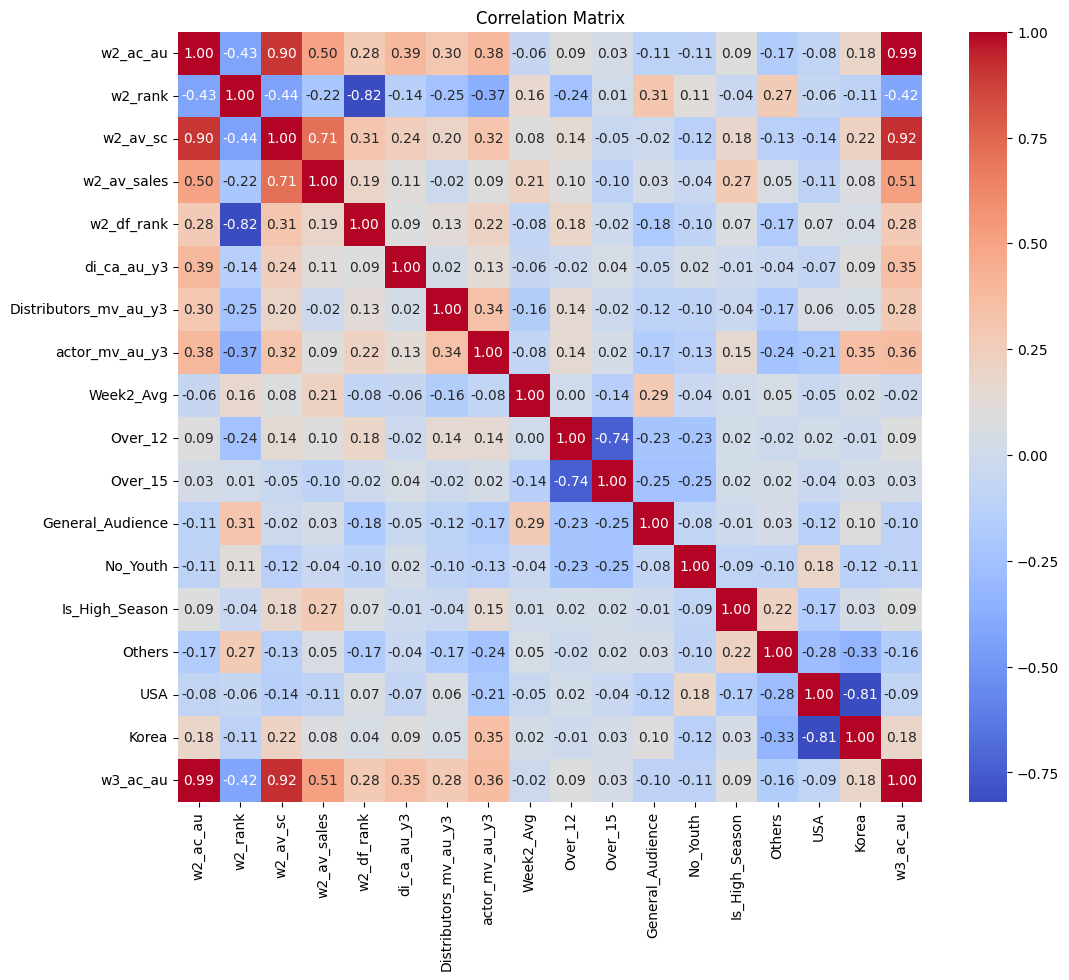

Best alpha for RMSE: 0.52 with RMSE: 111781.56580752722
Selected features for RMSE: ['w2_ac_au' 'w2_rank' 'w2_av_sc' 'w2_av_sales' 'w2_df_rank' 'di_ca_au_y3'
 'Distributors_mv_au_y3' 'actor_mv_au_y3' 'Week2_Avg' 'Is_High_Season'
 'Over_12' 'Over_15' 'General_Audience' 'No_Youth' 'USA' 'Korea' 'Others']
Best alpha for MAPE: 0.005 with MAPE: 5.037295733633081
Selected features for MAPE: ['w2_ac_au' 'w2_rank' 'w2_av_sc' 'w2_av_sales' 'w2_df_rank' 'di_ca_au_y3'
 'Distributors_mv_au_y3' 'actor_mv_au_y3' 'Week2_Avg' 'Is_High_Season'
 'Over_12' 'Over_15' 'General_Audience' 'No_Youth' 'USA' 'Korea' 'Others']
Best alpha for R²: 0.29000000000000004 with R²: 0.991382469945468
Selected features for R²: ['w2_ac_au' 'w2_rank' 'w2_av_sc' 'w2_av_sales' 'w2_df_rank' 'di_ca_au_y3'
 'Distributors_mv_au_y3' 'actor_mv_au_y3' 'Week2_Avg' 'Is_High_Season'
 'Over_12' 'Over_15' 'General_Audience' 'No_Youth' 'USA' 'Korea' 'Others']


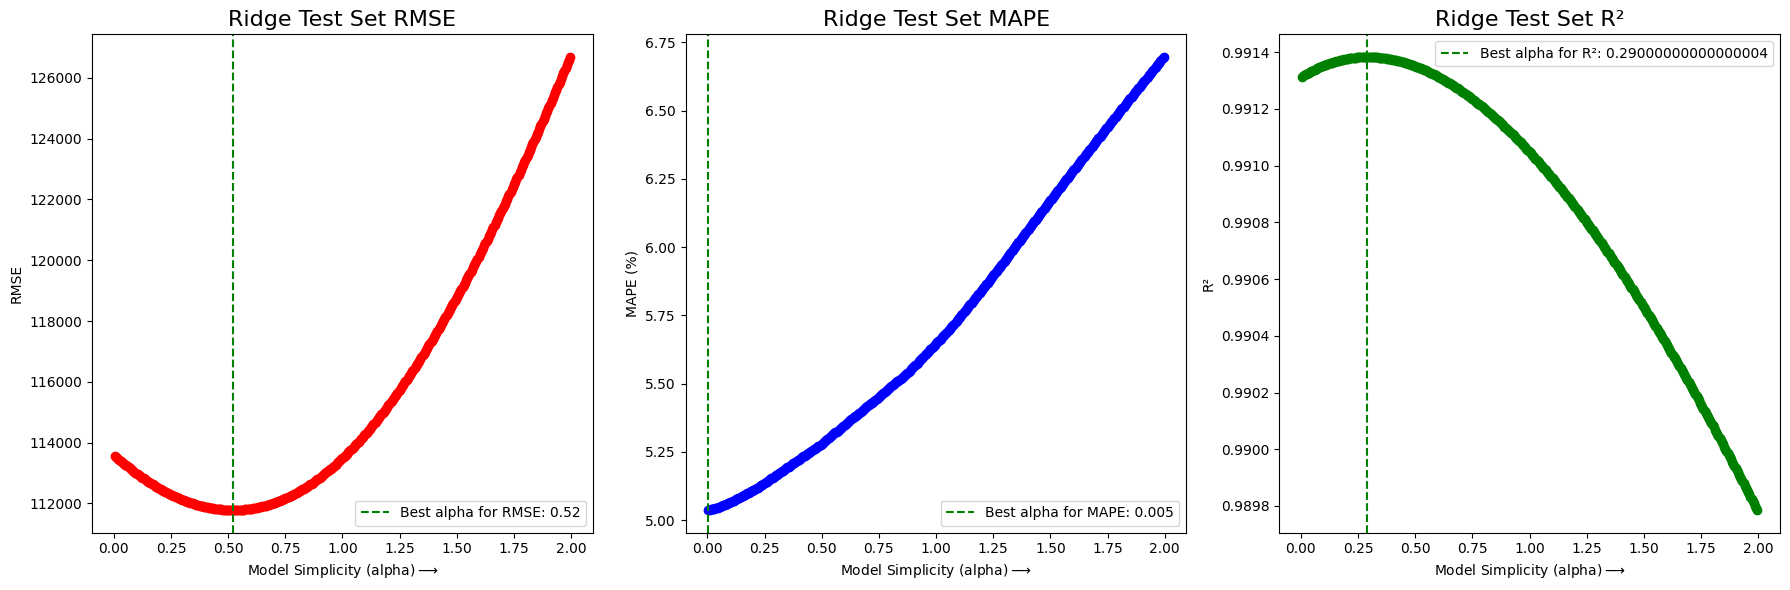

In [ ]:
#w3 예측 코드(알파값 찾기)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# CSV 파일 읽기
file_path = 'preprosessing_ver15.csv'  # 파일 경로를 지정하세요
df = pd.read_csv(file_path)

# 타겟 변수 설정
target_variable = 'w3_ac_au'

# 숫자형 데이터만 선택
numeric_cols = df.select_dtypes(include=[np.number]).columns

# 제외할 열들
exclude_cols = ['w1_slope', 'w1_df_rank', 'w1_mean_diff', 'w2_slope', 'w2_df_rank', 'w2_mean_diff']

# 범주형 열들 (예를 들어 사용자가 지정한 범주형 열들)
categorical_cols = ['Is_High_Season', 'Over_12', 'Over_15', 'General_Audience', 'No_Youth', 'USA', 'Korea', 'Others']

# 제외할 열들을 뺀 나머지 열들
cols_to_transform = [col for col in numeric_cols if col not in exclude_cols]

# 나머지 열들에 대해 0 이하의 값을 작은 양수로 대체
df[cols_to_transform] = df[cols_to_transform].apply(lambda x: np.where(x > 0, x, 1e-6))

user_selected_features = [
   'w2_ac_au', 'w2_rank', 'w2_av_sc', 'w2_av_sales',  'w2_df_rank',
   'di_ca_au_y3', 'Distributors_mv_au_y3', 'actor_mv_au_y3', 'Week2_Avg',
   'Over_12', 'Over_15', 'General_Audience', 'No_Youth', 'Is_High_Season',
   'Others', 'USA', 'Korea'
]

# 제공된 기본 피처 세트를 사용
X_transformed = df[user_selected_features].copy()

# 로그 변환 (exclude_cols 제외)
numeric_features_to_log = [col for col in user_selected_features if col not in categorical_cols + exclude_cols]
X_transformed[numeric_features_to_log] = np.log1p(X_transformed[numeric_features_to_log])
y_transformed = np.log1p(df[target_variable])

# 수치형 열만 스케일링
numeric_features = [col for col in user_selected_features if col not in categorical_cols]
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_transformed[numeric_features])

# 스케일링 된 수치형 데이터와 범주형 데이터를 다시 결합
X_combined = np.concatenate([X_numeric_scaled, X_transformed[categorical_cols].values], axis=1)

# 전체 피처 이름 리스트
combined_feature_names = numeric_features + categorical_cols

# 상관 계수 매트릭스 계산
correlation_matrix = df[user_selected_features + [target_variable]].corr()
print("Correlation Matrix")
print(correlation_matrix)
# 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# K-Fold 설정
k_fold = KFold(n_splits=10, shuffle=True, random_state=20)

# Ridge 모델 학습 및 평가
alphas = np.arange(0.005, 2, 0.005)
ridge_rmse_test = np.zeros(len(alphas))
ridge_mape_test = np.zeros(len(alphas))
ridge_r2_test = np.zeros(len(alphas))
ridge_coefs = np.zeros((len(alphas), X_combined.shape[1]))

for train_idx, test_idx in k_fold.split(X_combined):
    X_train, X_test = X_combined[train_idx], X_combined[test_idx]
    y_train, y_test = y_transformed.iloc[train_idx], y_transformed.iloc[test_idx]

    for i, alpha in enumerate(alphas):
        ridge_reg = Ridge(alpha=alpha)
        ridge_reg.fit(X_train, y_train)
        ridge_coefs[i] += ridge_reg.coef_ / k_fold.n_splits

        # 예측
        y_test_pred = ridge_reg.predict(X_test)

        # 예측값을 원래 스케일로 변환
        y_test_pred_original = np.expm1(y_test_pred)
        y_test_original = np.expm1(y_test)

        # RMSE 계산
        ridge_rmse_test[i] += mean_squared_error(y_test_original, y_test_pred_original, squared=False) / k_fold.n_splits

        # MAPE 계산 (퍼센트로 변환)
        ridge_mape_test[i] += mean_absolute_percentage_error(y_test_original, y_test_pred_original) * 100 / k_fold.n_splits

        # R^2 계산
        ridge_r2_test[i] += r2_score(y_test_original, y_test_pred_original) / k_fold.n_splits

# 최적의 알파 값과 해당하는 MAPE, RMSE, R² 값 찾기
min_rmse_index = np.argmin(ridge_rmse_test)
min_mape_index = np.argmin(ridge_mape_test)
max_r2_index = np.argmax(ridge_r2_test)

best_alpha_rmse = alphas[min_rmse_index]
best_rmse = ridge_rmse_test[min_rmse_index]

best_alpha_mape = alphas[min_mape_index]
best_mape = ridge_mape_test[min_mape_index]

best_alpha_r2 = alphas[max_r2_index]
best_r2 = ridge_r2_test[max_r2_index]

# 선택된 피처 출력
selected_features_rmse = np.array(combined_feature_names)[ridge_coefs[min_rmse_index] != 0]
selected_features_mape = np.array(combined_feature_names)[ridge_coefs[min_mape_index] != 0]
selected_features_r2 = np.array(combined_feature_names)[ridge_coefs[max_r2_index] != 0]

# 결과 출력
print(f"Best alpha for RMSE: {best_alpha_rmse} with RMSE: {best_rmse}")
print(f"Selected features for RMSE: {selected_features_rmse}")

print(f"Best alpha for MAPE: {best_alpha_mape} with MAPE: {best_mape}")
print(f"Selected features for MAPE: {selected_features_mape}")

print(f"Best alpha for R²: {best_alpha_r2} with R²: {best_r2}")
print(f"Selected features for R²: {selected_features_r2}")

# plot RMSE, MAPE, R^2
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.plot(alphas, ridge_rmse_test, 'ro-')
plt.title("Ridge Test Set RMSE", fontsize=16)
plt.xlabel("Model Simplicity (alpha)$\longrightarrow$")
plt.ylabel("RMSE")
plt.axvline(x=best_alpha_rmse, color='g', linestyle='--', label=f'Best alpha for RMSE: {best_alpha_rmse}')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(alphas, ridge_mape_test, 'bo-')
plt.title("Ridge Test Set MAPE", fontsize=16)
plt.xlabel("Model Simplicity (alpha)$\longrightarrow$")
plt.ylabel("MAPE (%)")
plt.axvline(x=best_alpha_mape, color='g', linestyle='--', label=f'Best alpha for MAPE: {best_alpha_mape}')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(alphas, ridge_r2_test, 'go-')
plt.title("Ridge Test Set R²", fontsize=16)
plt.xlabel("Model Simplicity (alpha)$\longrightarrow$")
plt.ylabel("R²")
plt.axvline(x=best_alpha_r2, color='g', linestyle='--', label=f'Best alpha for R²: {best_alpha_r2}')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# 최적의 알파 값으로 Ridge 회귀 모델 학습 및 평가
best_ridge_reg = Ridge(alpha=best_alpha_mape)

# K-Fold 설정
k_fold = KFold(n_splits=10, shuffle=True, random_state=20)

rmse_scores = []
mape_scores = []
r2_scores = []

for train_idx, test_idx in k_fold.split(X_combined):
    X_train, X_test = X_combined[train_idx], X_combined[test_idx]
    y_train, y_test = y_transformed.iloc[train_idx], y_transformed.iloc[test_idx]

    best_ridge_reg.fit(X_train, y_train)
    y_test_pred = best_ridge_reg.predict(X_test)

    # 예측값을 원래 스케일로 변환
    y_test_pred_original = np.expm1(y_test_pred)
    y_test_original = np.expm1(y_test)

    # RMSE 계산
    rmse = mean_squared_error(y_test_original, y_test_pred_original, squared=False)
    rmse_scores.append(rmse)

    # MAPE 계산
    mape = mean_absolute_percentage_error(y_test_original, y_test_pred_original) * 100
    mape_scores.append(mape)

    # R^2 계산
    r2 = r2_score(y_test_original, y_test_pred_original)
    r2_scores.append(r2)

# 최종 결과 출력
final_rmse = np.mean(rmse_scores)
final_mape = np.mean(mape_scores)
final_r2 = np.mean(r2_scores)

print(f"Final RMSE with best alpha for MAPE: {final_rmse}")
print(f"Final MAPE with best alpha for MAPE: {final_mape}")
print(f"Final R² with best alpha for MAPE: {final_r2}")


Final RMSE with best alpha for MAPE: 218743.01710966142
Final MAPE with best alpha for MAPE: 9.947995435759408
Final R² with best alpha for MAPE: 0.9624206855521787
